In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor

In [3]:
retail_data = pd.read_csv("datasets/clean_retail_data.csv")

retail_data.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Quarter,Year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,5,2,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,12,4,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,2,1,2010
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,2,1,2010
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,5,2,2010


#### all the column names except Weekly_Sales

In [4]:
FEATURES = list(retail_data.columns)

FEATURES.remove("Weekly_Sales")

FEATURES

['Store',
 'Holiday_Flag',
 'Temperature',
 'Fuel_Price',
 'CPI',
 'Unemployment',
 'Month',
 'Quarter',
 'Year']

#### this helper function is used for building the regression model and display the scores and prediction vs actual plot

In [19]:
def build_model(transformer, regression_model, target, predictor, dataset):
    
    X = dataset[predictor]
    y = dataset[target]
        
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    pipeline = Pipeline(steps=[("transformer", transformer), ("model", regression_model)])
    pipeline.fit(X_train, y_train)

    y_pred = pipeline.predict(X_test)
    
    print("Training Score: ", pipeline.score(X_train, y_train))
    print("Testing Score: ", r2_score(y_test, y_pred))
    print("MAE: ", mean_absolute_error(y_test, y_pred))
    print("RMSE: ", mean_squared_error(y_test, y_pred, squared=False))
    
    return {
            "training_score": pipeline.score(X_train, y_train),
            "testing_score": r2_score(y_test, y_pred),
            "mae": mean_absolute_error(y_test, y_pred),
            "rmse": mean_squared_error(y_test, y_pred, squared=False)
            }

#### is used to print all the stored scores from result_dict

In [20]:
def compare_result():
    for key in result_dict:
        print("Regression: ", key)
        print("Training Score: ", result_dict[key]["training_score"])
        print("Testing Score: ", result_dict[key]["testing_score"])
        print("MAE: ", result_dict[key]["mae"])
        print("RMSE: ", result_dict[key]["rmse"], end="\n{}\n".format(50*"-"))

#### lets find the result with a few selected columns(Store,CPI,Unemployment). Transformer and model are  defined and passed as arguments to build model helper function. 

In [21]:
result_dict = {}

In [22]:
transformer = ColumnTransformer(transformers=[
    ("one_hot_enc", OneHotEncoder(sparse=False, drop="first"), ["Store"])
], remainder="passthrough")

linear_reg = LinearRegression()

result_dict["Linear_Regression_selectedCols"] = build_model(transformer, linear_reg, 
                                                            "Weekly_Sales", 
                                                            ["Store", "CPI", "Unemployment"], 
                                                            retail_data)

Training Score:  0.9192817259978376
Testing Score:  0.9124310010844756
MAE:  93697.60188323465
RMSE:  173880.02647143241


#### linear regression
* finding the results with all the features

In [24]:
transformer = ColumnTransformer(transformers=[
    ("one_hot_enc", OneHotEncoder(sparse=False, drop="first"), ["Store", 
                                                                "Month", 
                                                                "Quarter",
                                                                "Year"])
], remainder="passthrough")

linear_reg = LinearRegression()

result_dict["Linear_Regression_allCols"] = build_model(transformer, linear_reg, 
                                                       "Weekly_Sales", FEATURES, 
                                                       retail_data)

Training Score:  0.929477238919511
Testing Score:  0.9383826544438278
MAE:  90975.95418312892
RMSE:  143343.5316896265


Models' Performance compared. Improvement can be seen. Note that same process is repeated for other models 

In [25]:
compare_result()

Regression:  Linear_Regression_selectedCols
Training Score:  0.9192817259978376
Testing Score:  0.9124310010844756
MAE:  93697.60188323465
RMSE:  173880.02647143241
--------------------------------------------------
Regression:  Linear_Regression_allCols
Training Score:  0.929477238919511
Testing Score:  0.9383826544438278
MAE:  90975.95418312892
RMSE:  143343.5316896265
--------------------------------------------------


#### ridge regression
* https://scikit-learn.org/stable/modules/linear_model.html#ridge-regression-and-classification

In [26]:
ridge_reg = Ridge()

result_dict["Ridge_Regression"] = build_model(transformer, ridge_reg, 
                                              "Weekly_Sales", FEATURES, 
                                              retail_data)

Training Score:  0.9304616317462234
Testing Score:  0.929877323464493
MAE:  88647.02149935559
RMSE:  151740.35441887635


In [27]:
compare_result()

Regression:  Linear_Regression_selectedCols
Training Score:  0.9192817259978376
Testing Score:  0.9124310010844756
MAE:  93697.60188323465
RMSE:  173880.02647143241
--------------------------------------------------
Regression:  Linear_Regression_allCols
Training Score:  0.929477238919511
Testing Score:  0.9383826544438278
MAE:  90975.95418312892
RMSE:  143343.5316896265
--------------------------------------------------
Regression:  Ridge_Regression
Training Score:  0.9304616317462234
Testing Score:  0.929877323464493
MAE:  88647.02149935559
RMSE:  151740.35441887635
--------------------------------------------------


#### KNeighbors
* https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html
* kneighbors seems to not give good results

In [35]:
kneighbors_reg = KNeighborsRegressor()

result_dict["KNeighbors_Regression"] = build_model(transformer, kneighbors_reg, 
                                                   "Weekly_Sales", FEATURES, 
                                                   retail_data)

Training Score:  0.4987786641316373
Testing Score:  0.19948686539527816
MAE:  411403.4348564232
RMSE:  523094.9257857293


In [36]:
compare_result()

Regression:  Linear_Regression_selectedCols
Training Score:  0.9192817259978376
Testing Score:  0.9124310010844756
MAE:  93697.60188323465
RMSE:  173880.02647143241
--------------------------------------------------
Regression:  Linear_Regression_allCols
Training Score:  0.929477238919511
Testing Score:  0.9383826544438278
MAE:  90975.95418312892
RMSE:  143343.5316896265
--------------------------------------------------
Regression:  Ridge_Regression
Training Score:  0.9304616317462234
Testing Score:  0.929877323464493
MAE:  88647.02149935559
RMSE:  151740.35441887635
--------------------------------------------------
Regression:  Lasso_Regression
Training Score:  0.9350218356028118
Testing Score:  0.9153533772525577
MAE:  93398.69251851109
RMSE:  166108.86921551556
--------------------------------------------------
Regression:  KNeighbors_Regression
Training Score:  0.4987786641316373
Testing Score:  0.19948686539527816
MAE:  411403.4348564232
RMSE:  523094.9257857293
----------------

#### decision tree
* https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

In [37]:
decision_tree_reg = DecisionTreeRegressor()

result_dict["DecisionTree_Regression"] = build_model(transformer, decision_tree_reg, 
                                                     "Weekly_Sales", FEATURES, 
                                                     retail_data)

Training Score:  1.0
Testing Score:  0.8874959099038296
MAE:  99946.10291351806
RMSE:  194618.95481399278


In [38]:
compare_result()

Regression:  Linear_Regression_selectedCols
Training Score:  0.9192817259978376
Testing Score:  0.9124310010844756
MAE:  93697.60188323465
RMSE:  173880.02647143241
--------------------------------------------------
Regression:  Linear_Regression_allCols
Training Score:  0.929477238919511
Testing Score:  0.9383826544438278
MAE:  90975.95418312892
RMSE:  143343.5316896265
--------------------------------------------------
Regression:  Ridge_Regression
Training Score:  0.9304616317462234
Testing Score:  0.929877323464493
MAE:  88647.02149935559
RMSE:  151740.35441887635
--------------------------------------------------
Regression:  Lasso_Regression
Training Score:  0.9350218356028118
Testing Score:  0.9153533772525577
MAE:  93398.69251851109
RMSE:  166108.86921551556
--------------------------------------------------
Regression:  KNeighbors_Regression
Training Score:  0.4987786641316373
Testing Score:  0.19948686539527816
MAE:  411403.4348564232
RMSE:  523094.9257857293
----------------

#### extratree
* https://scikit-learn.org/stable/modules/generated/sklearn.tree.ExtraTreeRegressor.html

In [39]:
extra_tree_reg = ExtraTreeRegressor()

result_dict["ExtraTreeRegressor_Regression"] = build_model(transformer, extra_tree_reg, 
                                                           "Weekly_Sales", FEATURES, 
                                                           retail_data)

Training Score:  1.0
Testing Score:  0.8919412201138771
MAE:  99164.30125104953
RMSE:  189105.57977602066


In [40]:
compare_result()

Regression:  Linear_Regression_selectedCols
Training Score:  0.9192817259978376
Testing Score:  0.9124310010844756
MAE:  93697.60188323465
RMSE:  173880.02647143241
--------------------------------------------------
Regression:  Linear_Regression_allCols
Training Score:  0.929477238919511
Testing Score:  0.9383826544438278
MAE:  90975.95418312892
RMSE:  143343.5316896265
--------------------------------------------------
Regression:  Ridge_Regression
Training Score:  0.9304616317462234
Testing Score:  0.929877323464493
MAE:  88647.02149935559
RMSE:  151740.35441887635
--------------------------------------------------
Regression:  Lasso_Regression
Training Score:  0.9350218356028118
Testing Score:  0.9153533772525577
MAE:  93398.69251851109
RMSE:  166108.86921551556
--------------------------------------------------
Regression:  KNeighbors_Regression
Training Score:  0.4987786641316373
Testing Score:  0.19948686539527816
MAE:  411403.4348564232
RMSE:  523094.9257857293
----------------

#### random forest regressor
* https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [42]:
random_forest_reg = RandomForestRegressor()

result_dict["RandomForest_Regression"] = build_model(transformer, random_forest_reg, 
                                                     "Weekly_Sales", FEATURES, 
                                                     retail_data)

Training Score:  0.9904818319106434
Testing Score:  0.9297535366010916
MAE:  77132.65999790088
RMSE:  151925.02549352686


All models's performances are ready for comparison. Linear Regression with all features seems to have best performance with highest Testing score and Lowest RMSE values.K-neighbours performance is worst.Reason may be due to unscaled continuous variables.

In [43]:
compare_result()

Regression:  Linear_Regression_selectedCols
Training Score:  0.9192817259978376
Testing Score:  0.9124310010844756
MAE:  93697.60188323465
RMSE:  173880.02647143241
--------------------------------------------------
Regression:  Linear_Regression_allCols
Training Score:  0.929477238919511
Testing Score:  0.9383826544438278
MAE:  90975.95418312892
RMSE:  143343.5316896265
--------------------------------------------------
Regression:  Ridge_Regression
Training Score:  0.9304616317462234
Testing Score:  0.929877323464493
MAE:  88647.02149935559
RMSE:  151740.35441887635
--------------------------------------------------
Regression:  Lasso_Regression
Training Score:  0.9350218356028118
Testing Score:  0.9153533772525577
MAE:  93398.69251851109
RMSE:  166108.86921551556
--------------------------------------------------
Regression:  KNeighbors_Regression
Training Score:  0.4987786641316373
Testing Score:  0.19948686539527816
MAE:  411403.4348564232
RMSE:  523094.9257857293
----------------

#### Here We are showing the process to obtain feature importances using random forest. 
https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

Feature importances help with model explainability

In [50]:
X = retail_data.drop(columns=["Weekly_Sales"])
y = retail_data["Weekly_Sales"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

random_forest_reg = RandomForestRegressor()

pipeline = Pipeline(steps=[("transformer", transformer), ("model", random_forest_reg)])

In [51]:
pipeline.fit(X_train, y_train)

print("Training Score: ", pipeline.score(X_train, y_train))

y_pred = pipeline.predict(X_test)
print("Testing Score: ", r2_score(y_test, y_pred))

Training Score:  0.9900418451176138
Testing Score:  0.9358314795464694


#### all the feature importance scores of all the columns

In [52]:
pipeline["model"].feature_importances_

array([7.23306995e-02, 7.71472468e-03, 8.07768537e-02, 9.31856015e-03,
       3.43872063e-02, 1.23907978e-03, 2.70531229e-03, 8.14478603e-03,
       7.22592151e-02, 2.36005564e-02, 8.32665603e-05, 7.51510512e-02,
       8.01044026e-02, 8.26586100e-03, 1.41085753e-03, 6.99488272e-04,
       3.22057140e-03, 2.61372614e-02, 8.82733610e-02, 7.28281349e-03,
       3.48456446e-04, 2.00731753e-02, 2.29357526e-02, 3.13200239e-03,
       6.51960813e-05, 5.71230768e-02, 7.57660444e-04, 8.09699863e-03,
       7.46361455e-03, 2.54305708e-02, 1.32954933e-02, 1.48509942e-02,
       5.92814839e-04, 5.50752784e-04, 7.35926999e-03, 9.26885330e-03,
       2.77787869e-03, 2.74963261e-02, 1.82248561e-05, 1.73546223e-02,
       7.72585709e-03, 1.58101905e-03, 1.54316512e-02, 9.08987315e-04,
       6.97385935e-04, 2.96488387e-04, 2.65972922e-04, 1.67866106e-04,
       3.47795676e-04, 1.88693457e-04, 2.00635442e-04, 4.97109267e-04,
       4.38360808e-04, 2.10355870e-03, 1.33858929e-02, 4.22558166e-04,
      

Feature importance scores are shown with features and their corresponding scores in a Dataframe

In [53]:
feature_imp = pd.DataFrame(pipeline["model"].feature_importances_, 
                           index=pipeline["transformer"].get_feature_names_out(),
                           columns=["Score"])

feature_imp

,Score
one_hot_enc__Store_2,0.072331
one_hot_enc__Store_3,0.007715
one_hot_enc__Store_4,0.080777
one_hot_enc__Store_5,0.009319
one_hot_enc__Store_6,0.034387
...,...
remainder__Holiday_Flag,0.006262
remainder__Temperature,0.019991
remainder__Fuel_Price,0.013135
remainder__CPI,0.047334


#### ploting each feature importance
* As we have seen earlier High selling stores 20 ,14,4,... has more importance followed by CPI

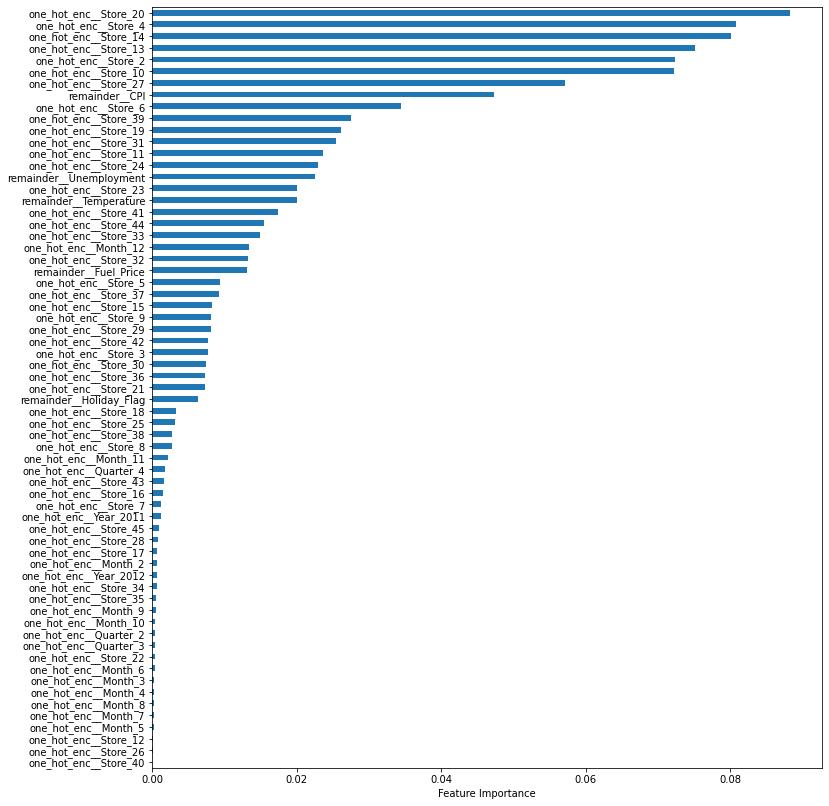

In [54]:
plt.figure(figsize=[12, 14])

feature_imp["Score"].sort_values().plot.barh()

plt.xlabel("Feature Importance")
plt.show()